In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
coco = COCO('../data/raw/annotations/instances_default.json')

loading annotations into memory...
Done (t=0.76s)
creating index...
index created!


In [3]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
image_quality, illness, gangrene, mould, blemish, dark_style_remains, artifact, condition, pedicel



In [4]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=[''])
imgIds = coco.getImgIds(catIds=catIds)
# img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img = coco.loadImgs(100)[0]
img

{'id': 100,
 'date_captured': 0,
 'coco_url': '',
 'file_name': 'images/0003_A_V_150_A.jpg',
 'license': 0,
 'flickr_url': '',
 'height': 1056,
 'width': 1056}

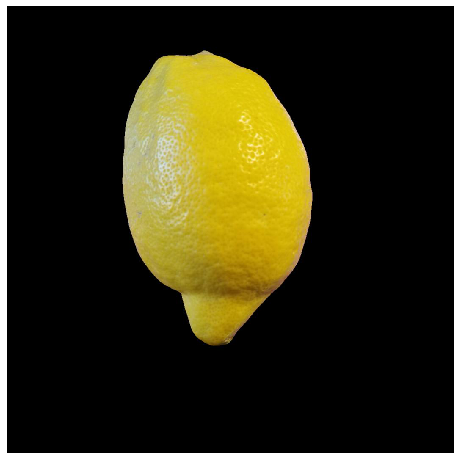

In [5]:
I = io.imread('../data/raw/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

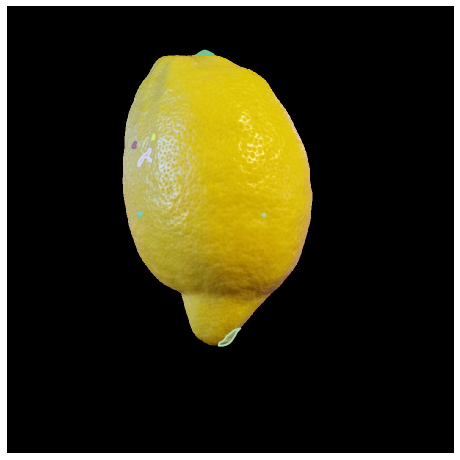

In [6]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [7]:
cat_set = []
for i, _ in enumerate(anns):
    cat_set.append(anns[i]['category_id'])
print(set(cat_set))

if 4 in cat_set or 3 in cat_set:
    print('non-edible')
elif 5 in cat_set or 6 in cat_set or 7 in cat_set or 2 in cat_set:
    print('commercial')
else:
    print('retail')

{2, 5, 7}
commercial


In [43]:
# annIds = coco.getAnnIds(imgIds=imgIds, catIds=catIds, iscrowd=None)
# anns = coco.loadAnns(annIds)
# # print(anns[0:11])
# catIds = coco.getCatIds(catNms=[''])
# imgIds = coco.getImgIds(catIds=catIds)
# output = []
# y_dict = {'id': list(), 'file_name': list(), 'target': list()}
# # print(imgIds)
# for _, i in enumerate(imgIds):
#     img = coco.loadImgs(i)[0]
#     annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
#     anns = coco.loadAnns(annIds)
#     id_ = anns[0]['image_id']
#     fname_= img['file_name']
#     target_ = 0
#     cat_set_ = []
#     for i, _ in enumerate(anns):
#         cat_set_.append(anns[i]['category_id'])
#         if 4 in cat_set_ or 3 in cat_set_:
#             target_ = 0
#         elif 5 in cat_set_ or 6 in cat_set_ or 2 in cat_set_:
#             target_ = 1
#         else:
#             target_ = 2
#     y_dict['id'].append(id_)
#     y_dict['file_name'].append(fname_)
#     y_dict['target'].append(target_)
# #     print(id_, fname_, set(cat_set_), target_)
# y_dict

{'id': [0,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  139,
  140,
  141,
  142,
  143,
  145,
  146,
  148,
  150,
  151,
  152,
  153,
  154,
  155,
  157,
  158,
  159,
  160,
  162,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  207,
  208,
  209,
  210,
  211,
  212,
  213,
  214,
  215,
  216,
  217,
  218,
  219,
  220,
  221,
  222,
  223,
  224,
  225,
  226,
  227,
  228,
  229,
  230,
  231,
  232,
  233,
  234,
  235,
  236,
  237,
  238,
  239,
  240,
  241,
  242,
  243,
  244,
  245,
  246,
  247,
  

In [48]:
from sklearn import datasets
d = datasets.load_iris()

In [49]:
d

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [50]:
d.target.shape

(150,)